# TP 1 : Premiers pas en science des données

**Avant de commencer :** Merci de bien lire le préambule et l'énoncé de ce TP. Ça vous évitera de perdre beaucoup de temps ensuite. 

**Rendu :** Le rendu doit contenir uniquement le fichier `.ipynb`. Le notebook doit être propre, le plus illustré et le plus commenté possible. 

**Librairies :** Ce TP repose sur les librairies standard suivantes : 
- Numpy version: 1.23.1
- matplotlib version : 3.5.2
- Pandas version: 1.4.3

Pour vérifier qu'elles sont bien installées dans votre environnement de travail, lancez la cellule suivante. Elle ne doit pas renvoyer d'erreur (un `Warning` n'est en général pas trop embêtant). 

S'il vous manque une librairie (`No module named ...`), vous pouvez l'installer 
- Soit en utilisant votre gestionnaire d'environnement (p.ex. `conda`). 
- Soit directement depuis le notebook, en faisant
```
!pip install nom_de_la_librairie==numero_de_la_version
```

In [2]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd

print("- Numpy version:", np.__version__)
print("- matplotlib version :", matplotlib.__version__)
print("- Pandas version:", pd.__version__)

- Numpy version: 1.26.3
- matplotlib version : 3.3.4
- Pandas version: 1.5.0


**Objectifs du TP :** Ce TP a pour but de vous faire manipuler quelques outils essentiels en science des données, notamment au travers des librairies `pandas` et `matplotlib`. 

## 1. Exploration de la base DVF

Cette partie est consacrée à l'exploration de la base DVF (Demande de Valeur Foncière). C'est une "vraie" base de données fournie par le service public et [disponible ici](https://www.data.gouv.fr/fr/datasets/demandes-de-valeurs-foncieres/).

Cette base enregistre toutes les transactions immobilières réalisées chaque année en France. Cela concerne les achats-ventes de maisons, d'appartemments, mais aussi de locaux de commerce (magasins, etc.), d'immeubles de bureau, etc. Comme cette base est assez grosse (plus de trois millions d'entrées en 2021) et assez complète (beaucoup d'informations qui ne nous intéressent pas forcément aujourd'hui), on met à disposition pour ce TP une base `dvf_residentiel.csv` qui est une sous-partie de la base `dvf` officielle obtenue de la manière suivante : 

- On a gardé uniquement les transactions de type `appartement` et `maison`
- On a gardé uniquement les transactions _unitaires_, c'est-à-dire où un seul logement est vendu (par opposition à la situation où un gros investisseur achète une résidence entière).
- On a gardé uniquement les transactions ayant lieu en France métropolitaine. 
- On a gardé uniquement les transactions à plus de 10 000 € (on considère les autres comme non-fiables). 
- On a gardé uniquement les attributs suivants:
  - 'code_departement' : type `str`, représentant le numéro de département où a eu lieu la transaction (p.ex. `'75'` pour une transaction à Paris)
  - 'surface_reelle_bati' : type `float`, la surface (en m²) de l'habitation.
  - 'nombre_pieces_principales' : type `float`, le nombre de pièces de l'habitation (chambre, salon, etc.)
  - 'surface_terrain' : type `float`, la surface du terrain (jardin, etc., en m²). `NaN` si pas de terrain.
  - 'longitude', 'latitude' : type `float`, les coordonnées GPS de l'habitation.
  - 'valeur_fonciere' : la valeur, en €, à laquelle la transaction a été enregistrée chez le notaire. 

Chargement de la base de donnée : exécuter la cellule suivante pour charger la base de donnée dans un dataframe. Attention, le fichier `dvf_residentiel.csv` doit être dans le même répertoire que le fichier `.ipynb` sur lequel vous êtes en train de travailler. 

In [3]:
# On charge la base de données.
# L'option dtype={'code_departement':'str'} indique que le code du département doit être traité comme une 
# chaîne de caractère. Ça permet d'éviter des bugs de typage avec la Corse (20A et 20B)).
dvf = pd.read_csv('./dvf_residentiel.csv', dtype={'code_departement':'str'})

On peut maintenant visualiser notre jeu de données en exécurant la cellule suivante :

In [4]:
dvf

,code_departement,surface_reelle_bati,nombre_pieces_principales,surface_terrain,longitude,latitude,valeur_fonciere
0,1,97.0,5.0,2410.0,5.386094,46.327140,185000.0
1,1,88.0,4.0,866.0,5.157688,46.200988,204332.0
2,1,168.0,5.0,1426.0,5.273260,46.156334,320000.0
3,1,71.0,3.0,NaN,5.200117,46.210292,176000.0
4,1,96.0,3.0,NaN,5.108604,46.244066,226700.0
...,...,...,...,...,...,...,...
714934,75,58.0,2.0,NaN,2.354883,48.852709,1550000.0
714935,75,15.0,1.0,NaN,2.345464,48.867430,190000.0
714936,75,15.0,1.0,NaN,2.350035,48.868906,230000.0
714937,75,30.0,2.0,NaN,2.367712,48.854200,383000.0


---

**Question 1 :** Combien d'observations contient cette base de données ? De quelle dimension sont nos données ?

Cette base de données contient 714 939 observations de données de dimension 7

---

**Question 2 :** En utilisant les méthodes `.describe()` et `.value_counts()` dont les documentations sont disponibles [ici](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.describe.html) et [là](https://pandas.pydata.org/docs/reference/api/pandas.Series.value_counts.html), répondre aux questions suivantes : 

- (a) Quelle a été le montant de la transaction la plus élevée de l'année 2021 ? 
- (b) Combien de pièces avaient, en moyenne, les logements vendus au cours de cette année ? 
- (c) Dans quel département y a-t-il eu le plus de transactions ? Le moins de transactions ?

_Remarque:_ Pour un meilleur affichage avec la méthode `.describe()`, on pourra ajouter `.apply(lambda x: format(x,'f'))`. Par exemple : `dvf['longitude'].describe().apply(lambda x: format(x,'f'))`

In [29]:
dvf['valeur_fonciere'].describe().apply(lambda x: format(x, 'f'))

count      714939.000000
mean       239577.480374
std        338594.168717
min         10000.580000
25%        110000.000000
50%        178350.000000
75%        285000.000000
max      89899536.000000
Name: valeur_fonciere, dtype: object

a - En applicant la fonction describe sur la 'valeur_fonciere' on observe que la transaction la plus élevée en 2021 est de 89 899 536 € (*max*)

In [30]:
dvf['nombre_pieces_principales'].describe().apply(lambda x: format(x, 'f'))

count    714930.000000
mean          3.500116
std           1.516200
min           0.000000
25%           2.000000
50%           3.000000
75%           4.000000
max          70.000000
Name: nombre_pieces_principales, dtype: object

b - Les logements vendus avaient en moyenne **3.50 pièces donc 3 pièces** (*ligne mean*)

In [38]:
dvf['code_departement'].value_counts()

59    35206
75    31799
33    24942
44    23521
6     22739
      ...  
5      1098
46      732
7       680
2B      540
48      489
Name: code_departement, Length: 93, dtype: int64

 c - Le département avec le moins de transations est le 48, et celui avec le plus de transactions est le 59

---

**Question 3 :** En utilisant la méthode `.loc[]` dont la documentation est disponible [ici](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.loc.html), déterminer 

- (a) la valeur moyenne d'une transaction à Paris (code_departement=='75'). 
- (b) la valeur moyenne d'une transaction dans les Bouches-du-Rhône (code_departement=='13').

In [45]:
dvf.loc[dvf['code_departement'] == '75'].describe()

,surface_reelle_bati,nombre_pieces_principales,surface_terrain,longitude,latitude,valeur_fonciere
count,31799.000000,31799.000000,162.000000,31799.000000,31799.000000,3.179900e+04
mean,54.599358,2.447247,198.413580,2.340450,48.862180,6.360189e+05
std,41.516518,1.320648,191.325343,0.037915,0.020013,8.492222e+05
min,2.000000,0.000000,31.000000,2.255896,48.818759,1.010000e+04
25%,28.000000,1.000000,81.750000,2.310701,48.845545,2.850000e+05
50%,44.000000,2.000000,137.500000,2.343545,48.862570,4.500000e+05
75%,69.000000,3.000000,221.000000,2.371576,48.879911,7.400000e+05
max,1561.000000,23.000000,1167.000000,2.412825,48.900565,6.780000e+07


a - La valeur moyenne d'une transation à Paris est de 636 018,90 €

In [46]:
dvf.loc[dvf['code_departement'] == '13'].describe()

,surface_reelle_bati,nombre_pieces_principales,surface_terrain,longitude,latitude,valeur_fonciere
count,14748.000000,14748.000000,5717.000000,14748.000000,14748.000000,1.474800e+04
mean,75.620830,3.322620,609.288088,5.233208,43.484908,2.734523e+05
std,37.074826,1.336333,4937.955890,0.256193,0.161354,2.542091e+05
min,1.000000,0.000000,5.000000,4.394665,43.169162,1.100000e+04
25%,52.000000,2.000000,196.000000,5.054523,43.344888,1.400000e+05
50%,71.000000,3.000000,422.000000,5.327533,43.468352,2.234750e+05
75%,91.000000,4.000000,665.000000,5.423245,43.591437,3.373250e+05
max,655.000000,32.000000,369359.000000,5.728913,43.908485,9.779465e+06


b - La valeur moyenne d'une transation dans les Bouches du Rhône est de 273 452,30€

---

**Question 4 :** Faisons maintenant un peu de visualisation. En utilisant la méthode `.hist()` dont la documentation est disponible [ici](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.hist.html), afficher la distribution des valeurs pour les attributs suivants : 'surface_reelle_bati', 'nombre_pieces_principales', 'surface_terrain', et 'valeur_fonciere'. 

On choisira un nombre de `bins` adapté. 

Quel problème remarquez-vous avec les valeurs foncières et les surfaces de terrain ? Trouvez une solution pour améliorer la visualisation.

<AxesSubplot:>

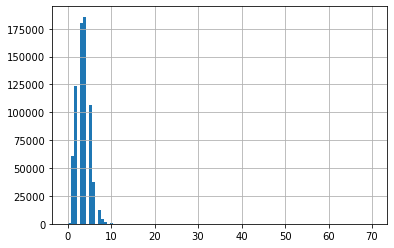

In [167]:
dvf['nombre_pieces_principales'].hist(bins=100)

<AxesSubplot:>

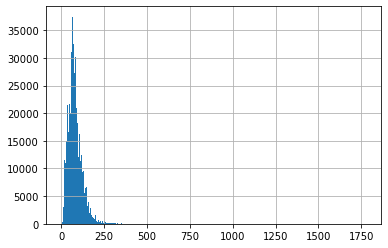

In [120]:
dvf['surface_reelle_bati'].hist(bins=500)

array([[<AxesSubplot:title={'center':'surface_terrain'}>]], dtype=object)

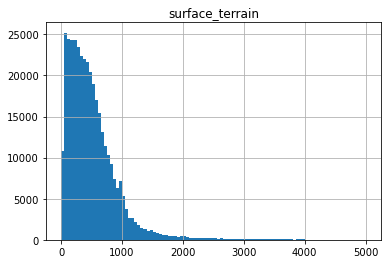

In [208]:
dvf.loc[dvf['surface_terrain'] <= 5000].hist(column='surface_terrain', bins=100)

count    370617.000000
mean        538.464501
std        1054.551756
min           1.000000
25%         216.000000
50%         420.000000
75%         680.000000
max      369359.000000
Name: surface_terrain, dtype: object

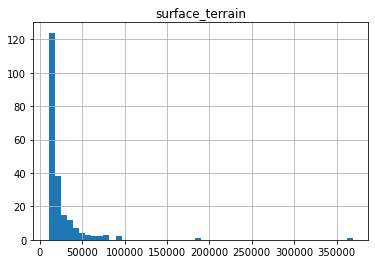

In [209]:
dvf.loc[dvf['surface_terrain'] > 10000].hist(column='surface_terrain', bins=50)
dvf['surface_terrain'].describe().apply(lambda x: format(x, 'f'))

array([[<AxesSubplot:title={'center':'valeur_fonciere'}>]], dtype=object)

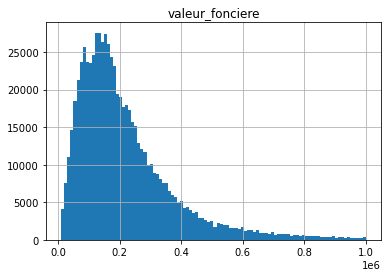

In [210]:
dvf.loc[dvf['valeur_fonciere'] <= 1_000_000].hist(column='valeur_fonciere', bins=100)

array([[<AxesSubplot:title={'center':'valeur_fonciere'}>]], dtype=object)

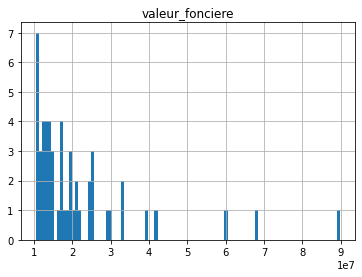

In [220]:
dvf.loc[dvf['valeur_fonciere'] > 10_000_000].hist(column='valeur_fonciere', bins=100)

Pour la surface de terrain, on sait que 75% des valeurs sont entre 1.0 et 680.0 alors que le max est de 370 000. Lorsque l'on essaye de mettre toutes les valeurs dans le même histogramme, on ne voit pas grand chose car l'interval de valeur sur l'axe des x est trop grand par rapport à nos valeurs. J'ai donc décidé de séparer en deux histogrammes, un premier avec les valeurs entre 1.0 et 5000 et un second pour les valeurs entre 10000 et le max

C'est le même principe pour la valeur foncière, 75% entre 10 000€ et 285 000€ alors que le max est à 89 899 536€.
J'ai donc fait un histogramme pour un prix allant de 10 000€ à 1 000 000€ et un second de 10 000 000 au max.

Les valeurs pour séparer les plages des histogrammes ont été choisis en augmentant peu à peu jusqu'à trouvé une limite où l'on obtient la majorité des valeurs dans le premier histogramme sans avoir un intervalle de valeurs trop grands sur l'axe des x

---

**Question 5 :** Compléter le morceau de code suivant pour afficher (grâce au géo-codage) les transactions supérieures à 1 000 000 €. Commentez le résultat obtenu. 

[Text(0.5, 1.0, 'Prix immobilier France'),
 Text(0.5, 0, 'longitude'),
 Text(0, 0.5, 'latitude')]

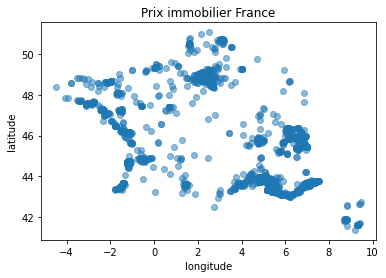

In [215]:
#  A COMPLETER
fig, ax = plt.subplots()

z = ax.scatter(data = dvf.loc[dvf['valeur_fonciere'] > 1_000_000], 
               x='longitude', y='latitude', 
               alpha=0.5)

ax.set(title='Prix immobilier France', xlabel='longitude', ylabel='latitude')

On observe qu'une majorité des mobiliers les plus chères vendus en 2021 se trouvent dans Paris et dans les Bouches du Rhônes

---

**Question 6 :** Créez dans le dataFrame `dvf` une nouvelle variable 'prix_m2' qui stocke le prix au mètre carré d'un logement, où on divise le prix du logement (valeur_fonciere) par sa surface (surface_reelle_bati). 

Remarque : on ne tient pas compte de la superficie du terrain ici.

In [221]:
dvf['prix_m2'] = dvf['valeur_fonciere'] / dvf['surface_reelle_bati']
dvf

,code_departement,surface_reelle_bati,nombre_pieces_principales,surface_terrain,longitude,latitude,valeur_fonciere,prix_m2
0,1,97.0,5.0,2410.0,5.386094,46.327140,185000.0,1907.216495
1,1,88.0,4.0,866.0,5.157688,46.200988,204332.0,2321.954545
2,1,168.0,5.0,1426.0,5.273260,46.156334,320000.0,1904.761905
3,1,71.0,3.0,NaN,5.200117,46.210292,176000.0,2478.873239
4,1,96.0,3.0,NaN,5.108604,46.244066,226700.0,2361.458333
...,...,...,...,...,...,...,...,...
714934,75,58.0,2.0,NaN,2.354883,48.852709,1550000.0,26724.137931
714935,75,15.0,1.0,NaN,2.345464,48.867430,190000.0,12666.666667
714936,75,15.0,1.0,NaN,2.350035,48.868906,230000.0,15333.333333
714937,75,30.0,2.0,NaN,2.367712,48.854200,383000.0,12766.666667


---

**Question 7 :** En déduire le prix moyen au m2 à Paris et dans les Bouches-du-Rhône en 2021.

In [ ]:
# Écrivez votre code ici

-- Écrivez vos commentaires ici --

---

**Question 8 :** En utilisant les méthodes `.isna()` et `.notna()` documentées [ici](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.isna.html) et [là](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.notna.html#pandas.DataFrame.notna), déterminer la différence de prix au m2 entre les logements disposant d'un terrain et ceux n'en disposant pas dans le Vaucluse ('code_departement'=='84') et un autre département de votre choix.

In [ ]:
# Écrivez votre code ici

-- Écrivez vos commentaires ici --

---

**Question 9 :** Déterminer le département dans lequel, en moyenne, les logements vendus ont le plus de pièces principales.

_Indication :_ On pourra utiliser la méthode `.unique()` documentée [ici](https://pandas.pydata.org/docs/reference/api/pandas.Series.unique.html). 

In [ ]:
# Écrivez votre code ici

-- Écrivez vos commentaires ici --

---

Faisons maintenant un peu de statistiques (avec les outils pratiques fourni par `pandas`). 

**Question 10 :** En utilisant la méthode `.corr()` documentée [ici](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.corr.html), déterminer quelles sont les variables les plus corrélées au prix ('valeur_fonciere') du logement.

In [ ]:
# Écrire votre code ici

-- Écrire vos commentaires ici --

---

## Partie 2 : Projet exploratoire

On travaille avec le dataset `earnings` évoqué ce matin en cours, disponible sous le nom `earnings.csv` et qu'on peut également télécharger [ici](https://www.kaggle.com/datasets/mukeshmanral/employ-earnings-data?select=batch2_jobID_00B80TR.csv). 

Ce dataset (en anglais) présente les salaires d'un million d'américains en fonction de divers paramètres : années d'expériences (`yearsExperience`), secteur d'activité (`industry`), filière choisie à l'université ('major'), etc. 

On vous demande d'explorer ce dataset, de tester des fonctionnalités `pandas`, de faire des remarques sur l'organisation des données, de la visualisation... 

Il n'y a pas de consigne spécifique : plus vous en faites, mieux ce sera !

Quelques pistes néanmoins (vous n'êtes pas obligé de faire exactement ça, c'est juste pour donner des idées) : 
- Que remarquez vous sur la distribution des années d'expérience ? sur la représentation des secteurs d'activité ? Qu'en déduisez-vous sur ce jeu de données ? 
- Y a-t-il des données aberrantes ? 
- Si on cherche à maximiser son salaire, quelle 'major' faut-il choisir ? 
- (Plus technique) Quelle est, en moyenne, l'évolution relative de salaire qu'on peut espérer chaque année ? 
    - Note : évolution relative = (année_n+1 - année_n) / année_n ; par exemple si je suis passé de 100 à 110 de salaire, j'ai eu une évolution relative de (110 - 100)/100 = 0.1 = 10%. 
    
    
Mais le plus important est de faire preuve de curiosité avec les différentes variables (et les outils mis à disposition). 